In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()

matplotlib.rc('font', family=font)


In [310]:
# 경고 숨기기
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [311]:
# 필요한 데이터 로드
studentInfo_df = pd.read_csv('./data/studentInfo.csv')[["id_student", "code_module", "highest_education", "studied_credits", "imd_band", "final_result"]]
studentVle_df = pd.read_csv('./data/studentVle.csv')[["id_student", "sum_click", "date"]]
studentAssessment_df = pd.read_csv('./data/studentAssessment.csv')[["id_assessment","id_student", "score"]]

# 데이터 병합
final_merged_data = pd.merge(studentInfo_df, studentAssessment_df, on='id_student', how='inner')


# id_student 기준으로 sum_click 합산 및 평균 계산
studentVle_agg = studentVle_df.groupby('id_student').agg(
    sum_click=('sum_click', 'sum'),  # 총 클릭 수
    mean_click=('sum_click', 'mean') # 평균 클릭 수
).reset_index()

# 기존 데이터와 병합
final_merged_data = pd.merge(final_merged_data, studentVle_agg, on='id_student', how='left')

# 결측치 처리 (학습 활동 기록이 없는 학생은 sum_click=0, mean_click=0)
final_merged_data['sum_click'] = final_merged_data['sum_click'].fillna(0)
final_merged_data['mean_click'] = final_merged_data['mean_click'].fillna(0)

# 병합된 데이터 저장
final_merged_data.to_csv('./data/merged_data.csv', index=False)

# 병합된 데이터 정보 출력
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207319 entries, 0 to 207318
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_student         207319 non-null  int64  
 1   code_module        207319 non-null  object 
 2   highest_education  207319 non-null  object 
 3   studied_credits    207319 non-null  int64  
 4   imd_band           198004 non-null  object 
 5   final_result       207319 non-null  object 
 6   id_assessment      207319 non-null  int64  
 7   score              207092 non-null  float64
 8   sum_click          207319 non-null  float64
 9   mean_click         207319 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 15.8+ MB


In [312]:
# 데이터 전처리 (결측지, 이상치)
final_merged_data['imd_band'] = final_merged_data['imd_band'].fillna('20-30%')
final_merged_data['score'] = final_merged_data['score'].fillna(0)

final_merged_data.to_csv('./data/merged_data.csv', index=False)

final_merged_data['imd_band'] = final_merged_data['imd_band'].replace('10-20', '10-20%')

In [313]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207319 entries, 0 to 207318
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_student         207319 non-null  int64  
 1   code_module        207319 non-null  object 
 2   highest_education  207319 non-null  object 
 3   studied_credits    207319 non-null  int64  
 4   imd_band           207319 non-null  object 
 5   final_result       207319 non-null  object 
 6   id_assessment      207319 non-null  int64  
 7   score              207319 non-null  float64
 8   sum_click          207319 non-null  float64
 9   mean_click         207319 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 15.8+ MB


In [314]:
final_merged_data.describe()

,id_student,studied_credits,id_assessment,score,sum_click,mean_click
count,2.073190e+05,207319.000000,207319.000000,207319.000000,207319.000000,207319.000000
mean,7.045991e+05,78.153474,26708.371727,75.319898,2413.717440,3.490478
std,5.504178e+05,38.000677,8428.225700,19.233205,2506.086114,1.132357
min,6.516000e+03,30.000000,1752.000000,0.000000,0.000000,0.000000
25%,5.066790e+05,60.000000,24284.000000,65.000000,713.000000,2.583851
50%,5.854490e+05,60.000000,25357.000000,79.000000,1625.000000,3.394649
75%,6.334320e+05,90.000000,34881.000000,89.000000,3304.000000,4.206860
max,2.698588e+06,630.000000,37443.000000,100.000000,28615.000000,19.427536


In [315]:
final_merged_data

,id_student,code_module,highest_education,studied_credits,imd_band,final_result,id_assessment,score,sum_click,mean_click
0,11391,AAA,HE Qualification,240,90-100%,Pass,1752,78.0,934.0,4.765306
1,11391,AAA,HE Qualification,240,90-100%,Pass,1753,85.0,934.0,4.765306
2,11391,AAA,HE Qualification,240,90-100%,Pass,1754,80.0,934.0,4.765306
3,11391,AAA,HE Qualification,240,90-100%,Pass,1755,85.0,934.0,4.765306
4,11391,AAA,HE Qualification,240,90-100%,Pass,1756,82.0,934.0,4.765306
...,...,...,...,...,...,...,...,...,...,...
207314,2684003,GGG,HE Qualification,30,50-60%,Distinction,37437,60.0,616.0,3.403315
207315,2684003,GGG,HE Qualification,30,50-60%,Distinction,37438,100.0,616.0,3.403315
207316,2684003,GGG,HE Qualification,30,50-60%,Distinction,37439,60.0,616.0,3.403315
207317,2684003,GGG,HE Qualification,30,50-60%,Distinction,37440,100.0,616.0,3.403315


In [316]:
# 라벨 인코딩, 스케일링

# code_module, highest_education

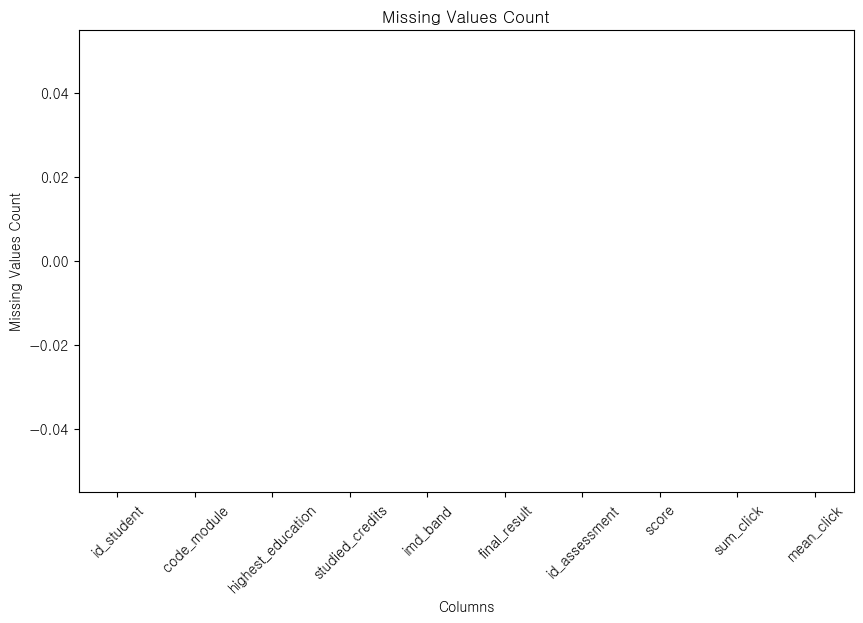

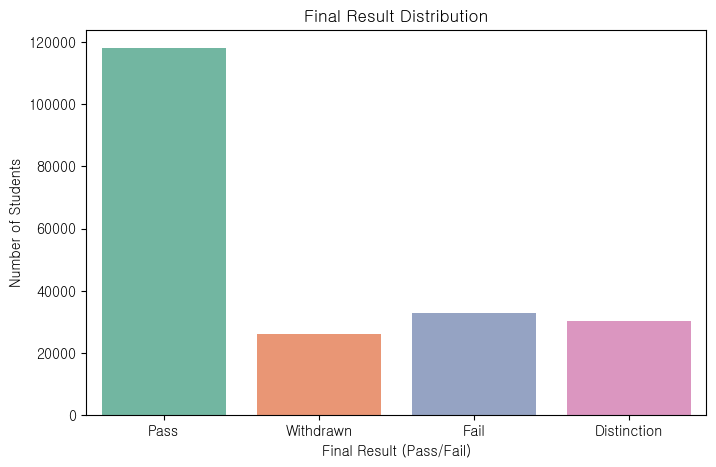

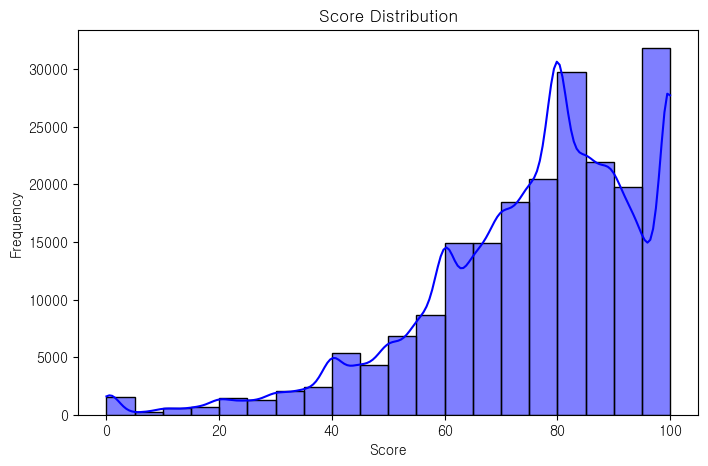

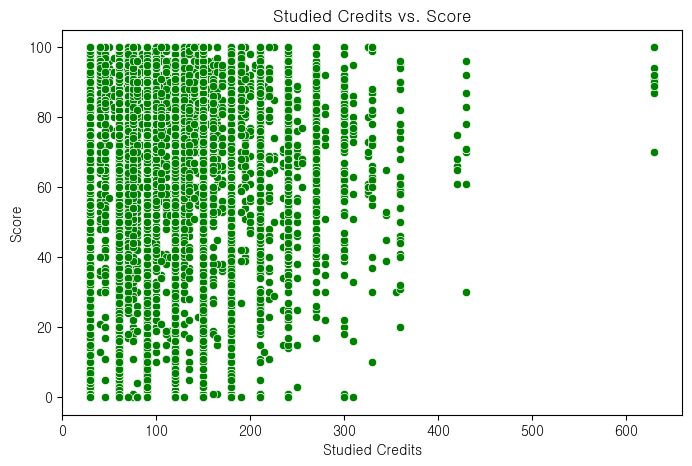

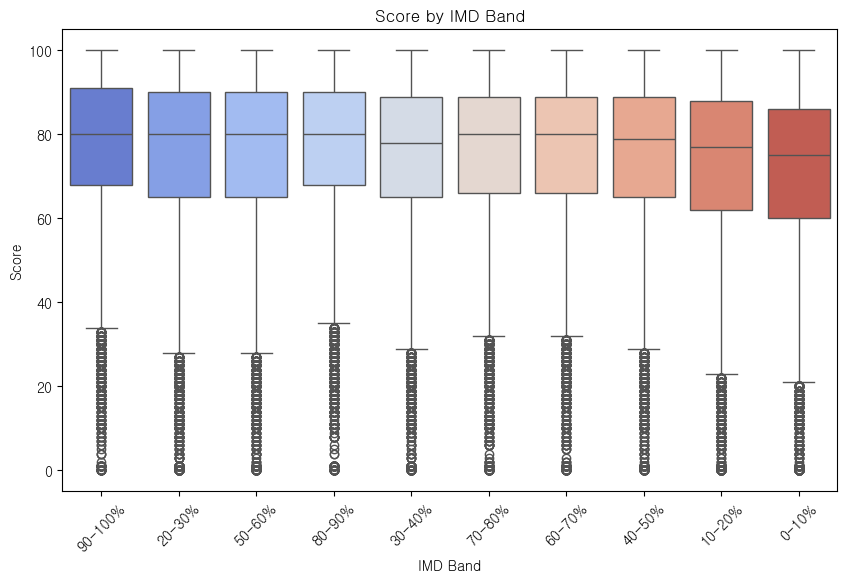

In [317]:
# 데이터 시각화
# 데이터 로드 (가정: 'final_merged_data'가 결측치 및 이상치 처리된 데이터)

# 1️⃣ 결측치 개수 시각화
plt.figure(figsize=(10, 6))
final_merged_data.isnull().sum().plot(kind='bar', color='lightcoral')
plt.title('Missing Values Count')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)
plt.show()

# 2️⃣ final_result (이탈 여부)별 학생 수 분포
plt.figure(figsize=(8, 5))
sns.countplot(x='final_result', data=final_merged_data, palette='Set2')
plt.title('Final Result Distribution')
plt.xlabel('Final Result (Pass/Fail)')
plt.ylabel('Number of Students')
plt.show()

# 3️⃣ score의 분포 (히스토그램)
plt.figure(figsize=(8, 5))
sns.histplot(final_merged_data['score'], kde=True, color='blue', bins=20)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# 4️⃣ studied_credits와 score 간의 관계 (산점도)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='studied_credits', y='score', data=final_merged_data, color='green')
plt.title('Studied Credits vs. Score')
plt.xlabel('Studied Credits')
plt.ylabel('Score')
plt.show()

# 5️⃣ imd_band 별 성적 차이 (박스플롯)
plt.figure(figsize=(10, 6))
sns.boxplot(x='imd_band', y='score', data=final_merged_data, palette='coolwarm')
plt.title('Score by IMD Band')
plt.xlabel('IMD Band')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


---
## 데이터 전처리 (범주형 데이터 -> 수치형 데이터로 변환)   - 민훈햄

In [318]:
# 데이터 전처리 (범주형 데이터 -> 수치형 데이터로 변환)

# highest_education 컬럼은 교육 수준을 나타내는 범주형(문자형) 데이터 -> 수치형 데이터로 변환
new_education_encodings = {
    'Post Graduate Qualification': 0,
    'HE Qualification': 1,
    'A Level or Equivalent': 2,
    'Lower Than A Level': 3,
    'No Formal quals': 4
}


In [319]:
final_merged_data['highest_education'] = final_merged_data['highest_education'].map(new_education_encodings)

final_merged_data.head(5)

,id_student,code_module,highest_education,studied_credits,imd_band,final_result,id_assessment,score,sum_click,mean_click
0,11391,AAA,1,240,90-100%,Pass,1752,78.0,934.0,4.765306
1,11391,AAA,1,240,90-100%,Pass,1753,85.0,934.0,4.765306
2,11391,AAA,1,240,90-100%,Pass,1754,80.0,934.0,4.765306
3,11391,AAA,1,240,90-100%,Pass,1755,85.0,934.0,4.765306
4,11391,AAA,1,240,90-100%,Pass,1756,82.0,934.0,4.765306


In [320]:
# final_result 컬럼을 이진 분류(Binary Classification) 형태로 변환.
# Withdrawn (중도 포기) → 0, 그 외 (Distinction, Fail, Pass) → 1
 #즉, 이탈 여부를 나타내는 새로운 변수로 변환:
# 0 = 학습 포기 (Withdrawn)
# 1 = 학습 지속 (Pass, Fail, Distinction)

new_final_result_encodings = {
    'Withdrawn': 0,
    'Distinction': 1,
    'Fail': 1,
    'Pass': 1
}

In [ ]:
final_merged_data['final_result'] = final_merged_data['final_result'].map(new_final_result_encodings)


,id_student,code_module,highest_education,studied_credits,imd_band,final_result,id_assessment,score,sum_click,mean_click
0,11391,AAA,1,240,90-100%,1,1752,78.0,934.0,4.765306
1,11391,AAA,1,240,90-100%,1,1753,85.0,934.0,4.765306
2,11391,AAA,1,240,90-100%,1,1754,80.0,934.0,4.765306
3,11391,AAA,1,240,90-100%,1,1755,85.0,934.0,4.765306
4,11391,AAA,1,240,90-100%,1,1756,82.0,934.0,4.765306
5,28400,AAA,1,60,20-30%,1,1752,70.0,1435.0,3.337209
6,28400,AAA,1,60,20-30%,1,1753,68.0,1435.0,3.337209
7,28400,AAA,1,60,20-30%,1,1754,70.0,1435.0,3.337209
8,28400,AAA,1,60,20-30%,1,1755,64.0,1435.0,3.337209
9,28400,AAA,1,60,20-30%,1,1756,60.0,1435.0,3.337209


In [322]:
# ode_module과 imd_band는 범주형 변수, 따라서 이를 숫자로 변환하는 과정.        ex) code_module:        imd_band (소득 수준 그룹):
# LabelEncoder()를 사용하여 각각의 고유한 문자열을 숫자로 변환.                      "AAA" → 0          "0-10%" → 0
# fit_transform()을 사용하여 문자를 고유한 정수값으로 매핑.                         "BBB" → 1           "10-20%" → 1
#                                                                                "CCC" → 2           "20-30%" → 2
from sklearn.preprocessing import LabelEncoder

# 데이터 복사
final_merged_data = final_merged_data.copy()

# LabelEncoder 초기화
label_encoder = LabelEncoder()

# 범주형 변수에 Label Encoding 적용
categorical_columns = ["code_module", "imd_band",]
for col in categorical_columns:
    final_merged_data[col] = label_encoder.fit_transform(final_merged_data[col])

In [331]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207319 entries, 0 to 207318
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_student         207319 non-null  int64  
 1   code_module        207319 non-null  int64  
 2   highest_education  207319 non-null  int64  
 3   studied_credits    207319 non-null  float64
 4   imd_band           207319 non-null  float64
 5   final_result       207319 non-null  int64  
 6   id_assessment      207319 non-null  int64  
 7   score              207319 non-null  float64
 8   sum_click          207319 non-null  float64
 9   mean_click         207319 non-null  float64
 10  z_score            207319 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 17.4 MB


In [323]:
final_merged_data.describe()

,id_student,code_module,highest_education,studied_credits,imd_band,final_result,id_assessment,score,sum_click,mean_click
count,2.073190e+05,207319.000000,207319.000000,207319.000000,207319.000000,207319.000000,207319.000000,207319.000000,207319.000000,207319.000000
mean,7.045991e+05,3.224519,2.181898,78.153474,4.334567,0.874715,26708.371727,75.319898,2413.717440,3.490478
std,5.504178e+05,1.739349,0.754684,38.000677,2.799749,0.331043,8428.225700,19.233205,2506.086114,1.132357
min,6.516000e+03,0.000000,0.000000,30.000000,0.000000,0.000000,1752.000000,0.000000,0.000000,0.000000
25%,5.066790e+05,2.000000,2.000000,60.000000,2.000000,1.000000,24284.000000,65.000000,713.000000,2.583851
50%,5.854490e+05,3.000000,2.000000,60.000000,4.000000,1.000000,25357.000000,79.000000,1625.000000,3.394649
75%,6.334320e+05,5.000000,3.000000,90.000000,7.000000,1.000000,34881.000000,89.000000,3304.000000,4.206860
max,2.698588e+06,6.000000,4.000000,630.000000,9.000000,1.000000,37443.000000,100.000000,28615.000000,19.427536


In [324]:
final_merged_data

,id_student,code_module,highest_education,studied_credits,imd_band,final_result,id_assessment,score,sum_click,mean_click
0,11391,0,1,240,9,1,1752,78.0,934.0,4.765306
1,11391,0,1,240,9,1,1753,85.0,934.0,4.765306
2,11391,0,1,240,9,1,1754,80.0,934.0,4.765306
3,11391,0,1,240,9,1,1755,85.0,934.0,4.765306
4,11391,0,1,240,9,1,1756,82.0,934.0,4.765306
...,...,...,...,...,...,...,...,...,...,...
207314,2684003,6,1,30,5,1,37437,60.0,616.0,3.403315
207315,2684003,6,1,30,5,1,37438,100.0,616.0,3.403315
207316,2684003,6,1,30,5,1,37439,60.0,616.0,3.403315
207317,2684003,6,1,30,5,1,37440,100.0,616.0,3.403315


---
# 인코딩 후, 스케일링 StandScaler, MinMaxScaler 적용

In [325]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler 표준화 적용
standard_scaler = StandardScaler()
final_merged_data[["studied_credits", "score"]] = standard_scaler.fit_transform(final_merged_data[["studied_credits", "score"]])

# MinMaxScaler 정규화 적용
minmax_scaler = MinMaxScaler()
final_merged_data[['imd_band']] = minmax_scaler.fit_transform(final_merged_data[['imd_band']])

print(final_merged_data.head(10))

   id_student  code_module  highest_education  studied_credits  imd_band  \
0       11391            0                  1         4.259053  1.000000   
1       11391            0                  1         4.259053  1.000000   
2       11391            0                  1         4.259053  1.000000   
3       11391            0                  1         4.259053  1.000000   
4       11391            0                  1         4.259053  1.000000   
5       28400            0                  1        -0.477716  0.222222   
6       28400            0                  1        -0.477716  0.222222   
7       28400            0                  1        -0.477716  0.222222   
8       28400            0                  1        -0.477716  0.222222   
9       28400            0                  1        -0.477716  0.222222   

   final_result  id_assessment     score  sum_click  mean_click  
0             1           1752  0.139348      934.0    4.765306  
1             1           1753 

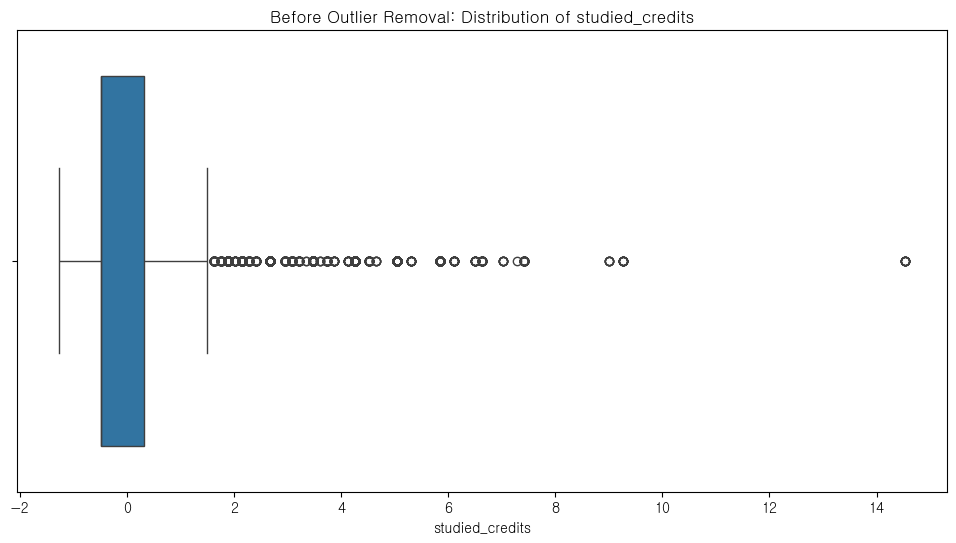

In [326]:
# 이상치 처리 전 시각화
# 이상치 처리 전의 studied_credits 분포
plt.figure(figsize=(12, 6))
sns.boxplot(x=final_merged_data['studied_credits'])
plt.title('Before Outlier Removal: Distribution of studied_credits')
plt.show()

In [327]:
final_merged_data.describe()

,id_student,code_module,highest_education,studied_credits,imd_band,final_result,id_assessment,score,sum_click,mean_click
count,2.073190e+05,207319.000000,207319.000000,2.073190e+05,207319.000000,207319.000000,207319.000000,2.073190e+05,207319.000000,207319.000000
mean,7.045991e+05,3.224519,2.181898,-6.580401e-17,0.481619,0.874715,26708.371727,1.124152e-16,2413.717440,3.490478
std,5.504178e+05,1.739349,0.754684,1.000002e+00,0.311083,0.331043,8428.225700,1.000002e+00,2506.086114,1.132357
min,6.516000e+03,0.000000,0.000000,-1.267177e+00,0.000000,0.000000,1752.000000,-3.916148e+00,0.000000,0.000000
25%,5.066790e+05,2.000000,2.000000,-4.777156e-01,0.222222,1.000000,24284.000000,-5.365680e-01,713.000000,2.583851
50%,5.854490e+05,3.000000,2.000000,-4.777156e-01,0.444444,1.000000,25357.000000,1.913415e-01,1625.000000,3.394649
75%,6.334320e+05,5.000000,3.000000,3.117459e-01,0.777778,1.000000,34881.000000,7.112769e-01,3304.000000,4.206860
max,2.698588e+06,6.000000,4.000000,1.452205e+01,1.000000,1.000000,37443.000000,1.283206e+00,28615.000000,19.427536


In [328]:
from scipy.stats import zscore

# Q1, Q3, IQR을 확인해서 어떻게 이상치를 처리할지 결정
Q1 = final_merged_data['studied_credits'].quantile(0.25)
Q3 = final_merged_data['studied_credits'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# 이상치가 있는지 확인
outliers = final_merged_data[(final_merged_data['studied_credits'] < lower_bound) | 
                             (final_merged_data['studied_credits'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")


# Z-Score 계산
final_merged_data['z_score'] = zscore(final_merged_data['studied_credits'])

# Z-Score가 3 이상인 값은 이상치로 간주
outliers_z = final_merged_data[final_merged_data['z_score'].abs() > 3]

print(f"Number of outliers based on z-score: {outliers_z.shape[0]}")

Q1: -0.4777156285985866, Q3: 0.3117458897943474, IQR: 0.789461518392934
Lower Bound: -1.6619079061879876, Upper Bound: 1.4959381673837484
Number of outliers: 11867
Number of outliers based on z-score: 2384


In [329]:
final_merged_data.describe()

,id_student,code_module,highest_education,studied_credits,imd_band,final_result,id_assessment,score,sum_click,mean_click,z_score
count,2.073190e+05,207319.000000,207319.000000,2.073190e+05,207319.000000,207319.000000,207319.000000,2.073190e+05,207319.000000,207319.000000,2.073190e+05
mean,7.045991e+05,3.224519,2.181898,-6.580401e-17,0.481619,0.874715,26708.371727,1.124152e-16,2413.717440,3.490478,-1.316080e-17
std,5.504178e+05,1.739349,0.754684,1.000002e+00,0.311083,0.331043,8428.225700,1.000002e+00,2506.086114,1.132357,1.000002e+00
min,6.516000e+03,0.000000,0.000000,-1.267177e+00,0.000000,0.000000,1752.000000,-3.916148e+00,0.000000,0.000000,-1.267177e+00
25%,5.066790e+05,2.000000,2.000000,-4.777156e-01,0.222222,1.000000,24284.000000,-5.365680e-01,713.000000,2.583851,-4.777156e-01
50%,5.854490e+05,3.000000,2.000000,-4.777156e-01,0.444444,1.000000,25357.000000,1.913415e-01,1625.000000,3.394649,-4.777156e-01
75%,6.334320e+05,5.000000,3.000000,3.117459e-01,0.777778,1.000000,34881.000000,7.112769e-01,3304.000000,4.206860,3.117459e-01
max,2.698588e+06,6.000000,4.000000,1.452205e+01,1.000000,1.000000,37443.000000,1.283206e+00,28615.000000,19.427536,1.452205e+01


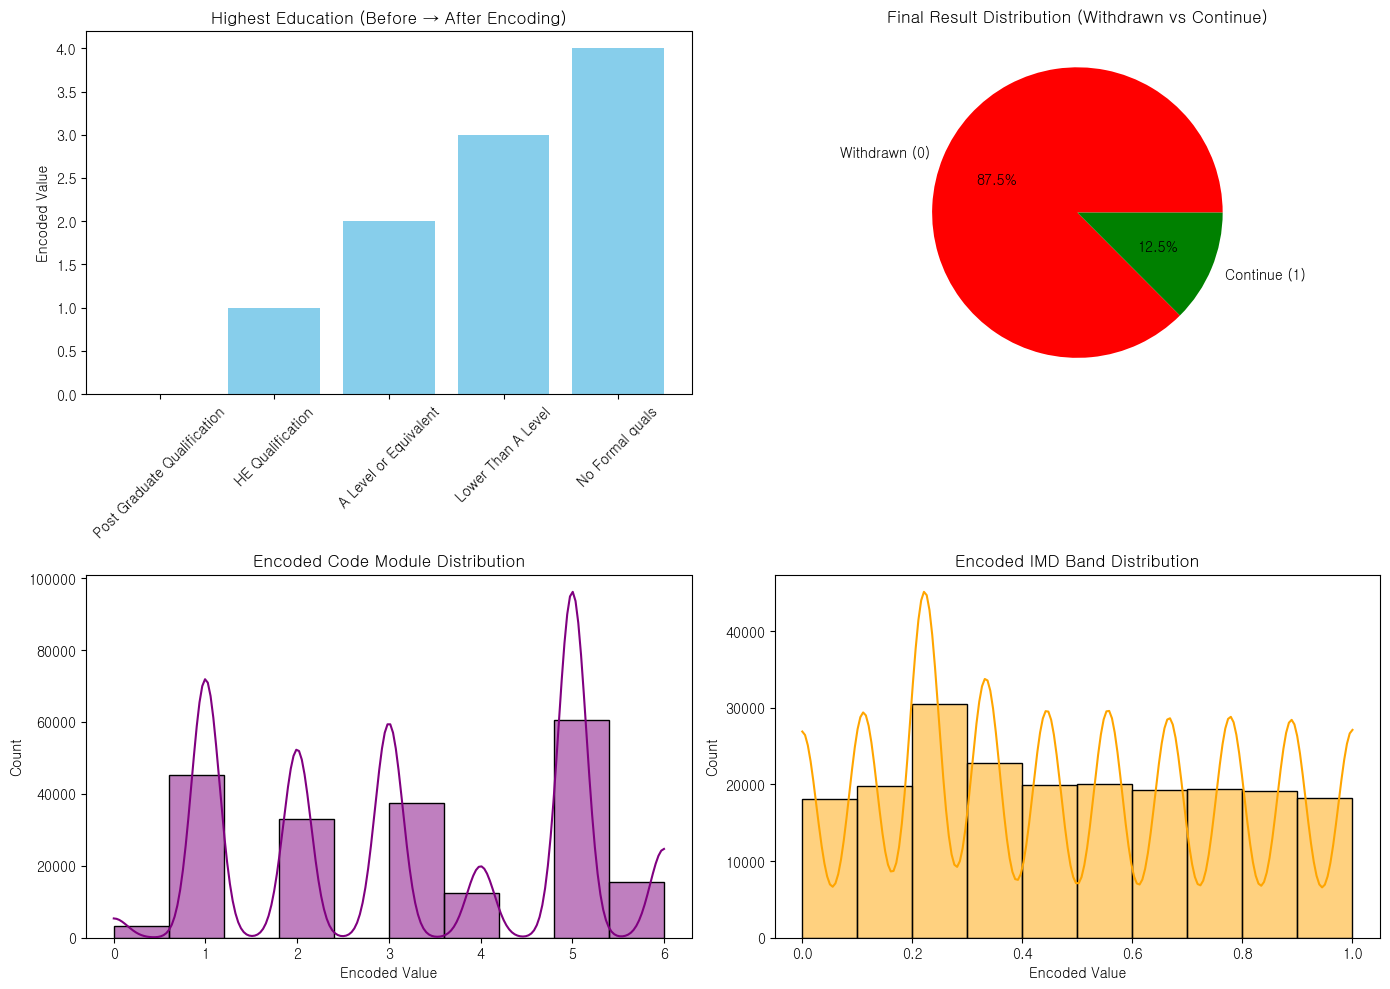

In [330]:
# 자료 시각화

# Figure 사이즈 설정
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


# 교육 수준(highest_education) 변환 전/후 비교
# 원래 교육 수준이 어떤 값이었는지, 그리고 이를 숫자로 변환한 값이 어떻게 매핑되었는지 막대 그래프로 표현.
# 1️⃣ highest_education 변환 전/후 비교
original_education = ['Post Graduate Qualification', 'HE Qualification', 'A Level or Equivalent', 'Lower Than A Level', 'No Formal quals']
encoded_education = [0, 1, 2, 3, 4]

axes[0, 0].bar(original_education, encoded_education, color='skyblue')
axes[0, 0].set_title("Highest Education (Before → After Encoding)")
axes[0, 0].set_ylabel("Encoded Value")
axes[0, 0].set_xticklabels(original_education, rotation=45)


# 이탈 여부(final_result) 변환 후 비교
# Withdrawn(0) vs Continue(1) 형태로 변환된 데이터를 파이 차트로 표현하여 이탈과 지속 학습 학생 비율 확인.
# 2️⃣ final_result 변환 전/후 비교 (파이 차트)
final_result_counts = final_merged_data['final_result'].value_counts()
axes[0, 1].pie(final_result_counts, labels=['Withdrawn (0)', 'Continue (1)'], autopct='%1.1f%%', colors=['red', 'green'])
axes[0, 1].set_title("Final Result Distribution (Withdrawn vs Continue)")


# code_module 변환 후 분포
# Label Encoding을 적용한 code_module 컬럼의 값이 어떻게 분포하는지 확인하기 위한 히스토그램.
# 3️⃣ code_module 변환 후 분포 (히스토그램)
sns.histplot(final_merged_data['code_module'], bins=10, kde=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Encoded Code Module Distribution")
axes[1, 0].set_xlabel("Encoded Value")
axes[1, 0].set_ylabel("Count")


# imd_band 변환 후 분포
# Label Encoding을 적용한 imd_band 컬럼의 값이 어떻게 분포하는지 확인하기 위한 히스토그램.
# 4️⃣ imd_band 변환 후 분포 (히스토그램)
sns.histplot(final_merged_data['imd_band'], bins=10, kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Encoded IMD Band Distribution")
axes[1, 1].set_xlabel("Encoded Value")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
# 모델 뭐 쓸지 ,왜 쓸지